In [98]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [99]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
#loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'univorm_cell_size', 'univorm_cell_shape',
         'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin'
         , 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [101]:
# Preprocessing the data
df.replace('?', -99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

# print the shape of dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'univorm_cell_size', 'univorm_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [102]:
# Do dataset visualizations
print(df.loc[1])

clump_thickness            5
univorm_cell_size          4
univorm_cell_shape         4
marginal_adhesion          5
single_epithelial_size     7
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            2
mitoses                    1
class                      2
Name: 1, dtype: object


In [103]:
# describe the dataset
print(df.describe())

       clump_thickness  univorm_cell_size  univorm_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


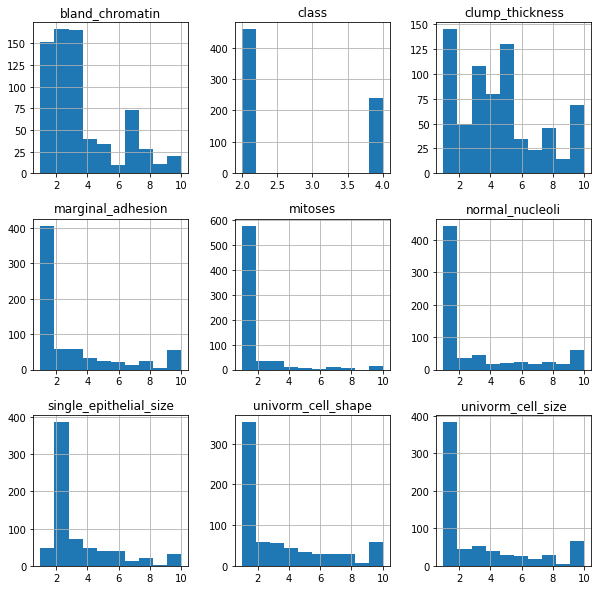

In [104]:
df.hist(figsize = (10, 10))
plt.show()

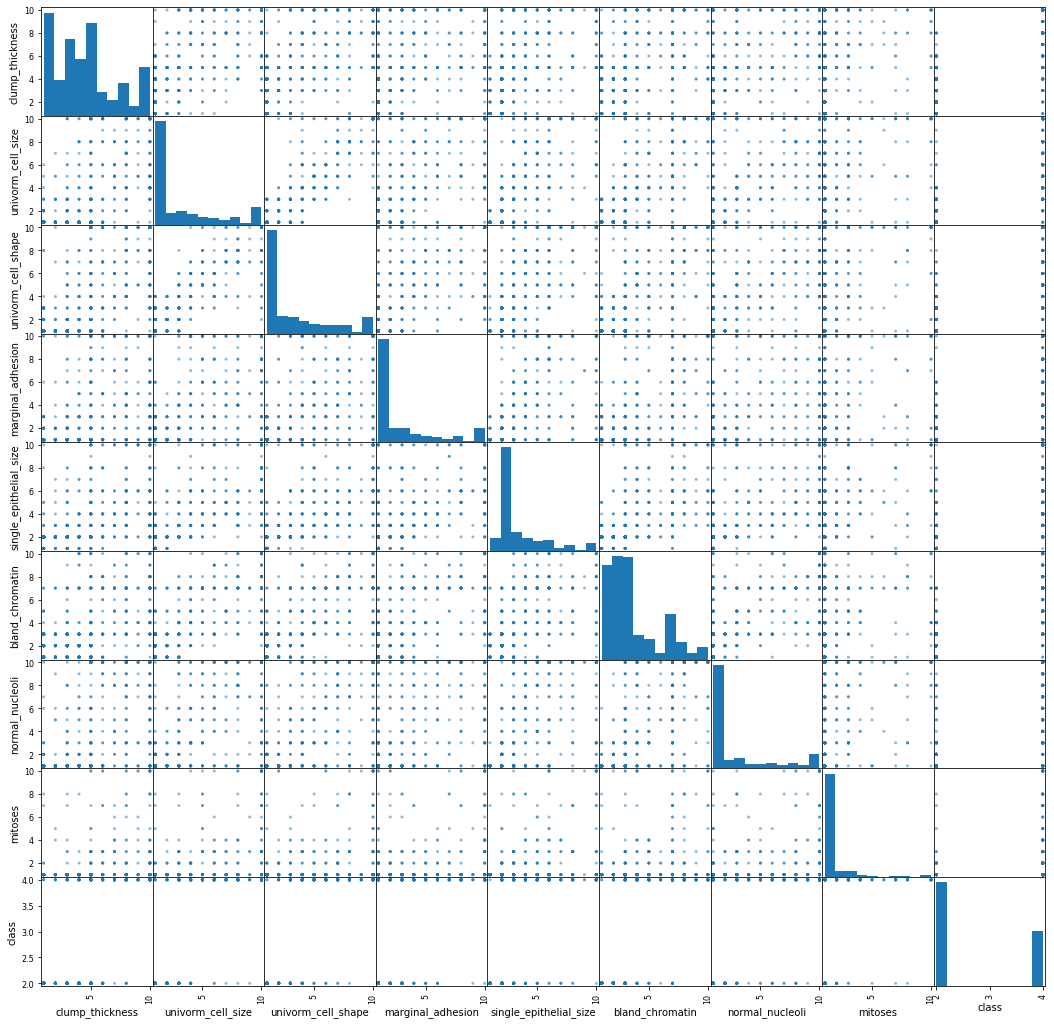

In [105]:
scatter_matrix(df, figsize = (18, 18))
plt.show()

In [106]:
# Creating X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)
print(X)

[[ 0.20693572 -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 [ 0.20693572  0.28384518  0.2668747  ... -0.17966213 -0.28411186
  -0.34391178]
 [-0.50386559 -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [ 0.20693572  2.25152563  2.28722218 ...  1.87236122  2.33759359
   0.23956962]
 [-0.14846494  1.59563215  0.94032386 ...  2.69317056  1.02674087
  -0.34391178]
 [-0.14846494  1.59563215  1.61377302 ...  2.69317056  0.37131451
  -0.34391178]]


In [107]:
# specifying testing options
seed = 8
scoring = 'accuracy'

In [108]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.952304 (0.021297)
SVM: 0.952304 (0.028395)


In [109]:
# makeing predictions on validation datasets

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.98      1.00      0.99        45
           4       1.00      0.96      0.98        25

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.98        70
weighted avg       0.99      0.99      0.99        70

SVM
0.9857142857142858
              precision    recall  f1-score   support

           2       0.98      1.00      0.99        45
           4       1.00      0.96      0.98        25

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.98        70
weighted avg       0.99      0.99      0.99        70



In [110]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[5, 4, 4, 5, 7, 10, 3, 2, 2]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)


0.9857142857142858
[4]
